# DECISION TREE

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms
import sklearn.tree as tr


# Load the dataset
water = pd.read_csv('waterQuality1.csv')  # Assuming the dataset is stored in a CSV file

# Data exploration and preprocessing
print(water.head())  # To see the first few rows of the dataset
print(water.describe())  # To get statistical information about the dataset


   aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32    21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01    14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36    11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92    24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  

In [2]:
# Check for missing values
print("Missing values:\n",water.isnull().sum())

Missing values:
 aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64


In [3]:
positive = water[water['is_safe'].isin([1])]
negative = water[water['is_safe'].isin([0])]

print("Length of data:\n",len(water))
print("Positive_result:\n",len(positive))
print("Negative_result:\n",len(negative))

Length of data:
 5999
Positive_result:
 898
Negative_result:
 5101


In [4]:
#split train and test data
X = water.drop("is_safe", axis=1).values
y = water["is_safe"].values
x_tr, x_tes, y_tr, y_tes = ms.train_test_split(X,y ,test_size=0.25, random_state=124)

print('X_train shape : {}'.format(x_tr.shape))
print('X_test shape : {}'.format(x_tes.shape))
print('y_train shape : {}'.format(y_tr.shape))
print('y_test shape : {}'.format(y_tes.shape))

X_train shape : (4499, 20)
X_test shape : (1500, 20)
y_train shape : (4499,)
y_test shape : (1500,)


In [5]:
#Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_tr = sc_X.fit_transform(x_tr)
x_tes = sc_X.transform(x_tes)

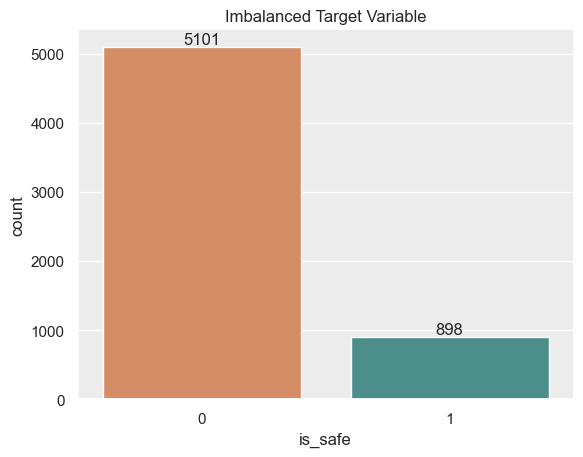

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

list_of_num_features = water.loc[:, water.columns != 'is_safe']
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'})

# Create the countplot with white grid and specified background color
ax = sns.countplot(x="is_safe", data=water, palette=palette_features)
plt.title("Imbalanced Target Variable")
ax.bar_label(ax.containers[0])

# Display the plot
plt.show()

In [7]:
#balancing data
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler

# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(x_tr, y_tr)
# summarize class distribution
print(Counter(y))


Counter({0: 5101, 1: 898})
Counter({0: 3822, 1: 3822})


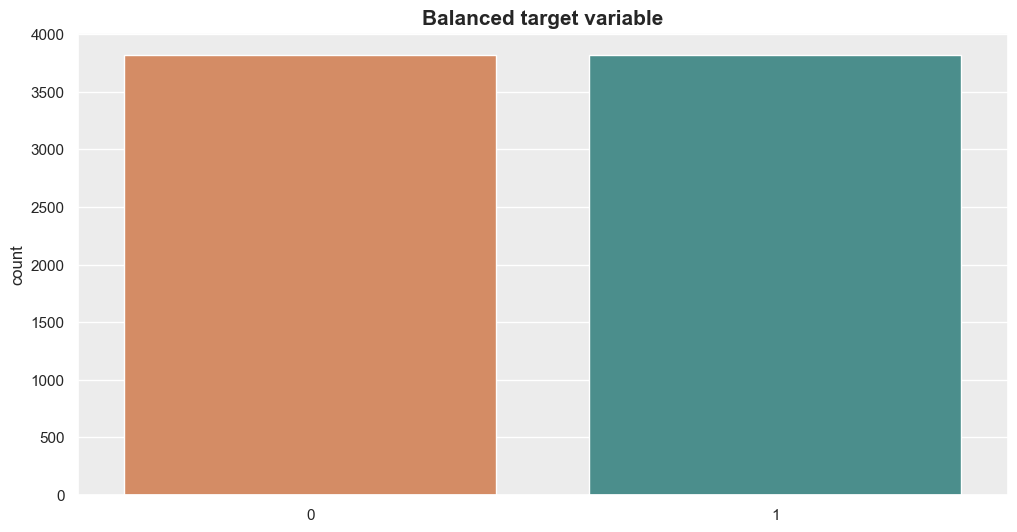

In [8]:
sns.set(rc={'axes.facecolor':'#ECECEC'}) 
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y, data=water, palette=palette_features)
plt.show()

In [9]:
#X = water.drop("is_safe", axis=1).values
#y = water["is_safe"].values
x_tr, x_tes, y_tr, y_tes = ms.train_test_split(X,y ,test_size=0.25, random_state=124)

print('X_train shape : {}'.format(x_tr.shape))
print('X_test shape : {}'.format(x_tes.shape))
print('y_train shape : {}'.format(y_tr.shape))
print('y_test shape : {}'.format(y_tes.shape))

#Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_tr = sc_X.fit_transform(x_tr)
x_tes = sc_X.transform(x_tes)

X_train shape : (5733, 20)
X_test shape : (1911, 20)
y_train shape : (5733,)
y_test shape : (1911,)


|--- feature_4 <= -0.58
|   |--- feature_0 <= -0.66
|   |   |--- feature_18 <= -0.52
|   |   |   |--- class: 1
|   |   |--- feature_18 >  -0.52
|   |   |   |--- class: 0
|   |--- feature_0 >  -0.66
|   |   |--- feature_15 <= 1.63
|   |   |   |--- class: 1
|   |   |--- feature_15 >  1.63
|   |   |   |--- class: 0
|--- feature_4 >  -0.58
|   |--- feature_18 <= -0.52
|   |   |--- feature_5 <= -0.93
|   |   |   |--- class: 0
|   |   |--- feature_5 >  -0.93
|   |   |   |--- class: 1
|   |--- feature_18 >  -0.52
|   |   |--- class: 0



[Text(0.5769230769230769, 0.875, 'x[4] <= -0.582\ngini = 0.5\nsamples = 5733\nvalue = [2903, 2830]'),
 Text(0.3076923076923077, 0.625, 'x[0] <= -0.662\ngini = 0.39\nsamples = 3030\nvalue = [805, 2225]'),
 Text(0.15384615384615385, 0.375, 'x[18] <= -0.52\ngini = 0.421\nsamples = 821\nvalue = [574, 247]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.483\nsamples = 330\nvalue = [135, 195]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.189\nsamples = 491\nvalue = [439, 52]'),
 Text(0.46153846153846156, 0.375, 'x[15] <= 1.63\ngini = 0.187\nsamples = 2209\nvalue = [231, 1978]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.132\nsamples = 2091\nvalue = [148, 1943]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.417\nsamples = 118\nvalue = [83, 35]'),
 Text(0.8461538461538461, 0.625, 'x[18] <= -0.52\ngini = 0.347\nsamples = 2703\nvalue = [2098, 605]'),
 Text(0.7692307692307693, 0.375, 'x[5] <= -0.928\ngini = 0.444\nsamples = 1817\nvalue = [1212, 605]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.

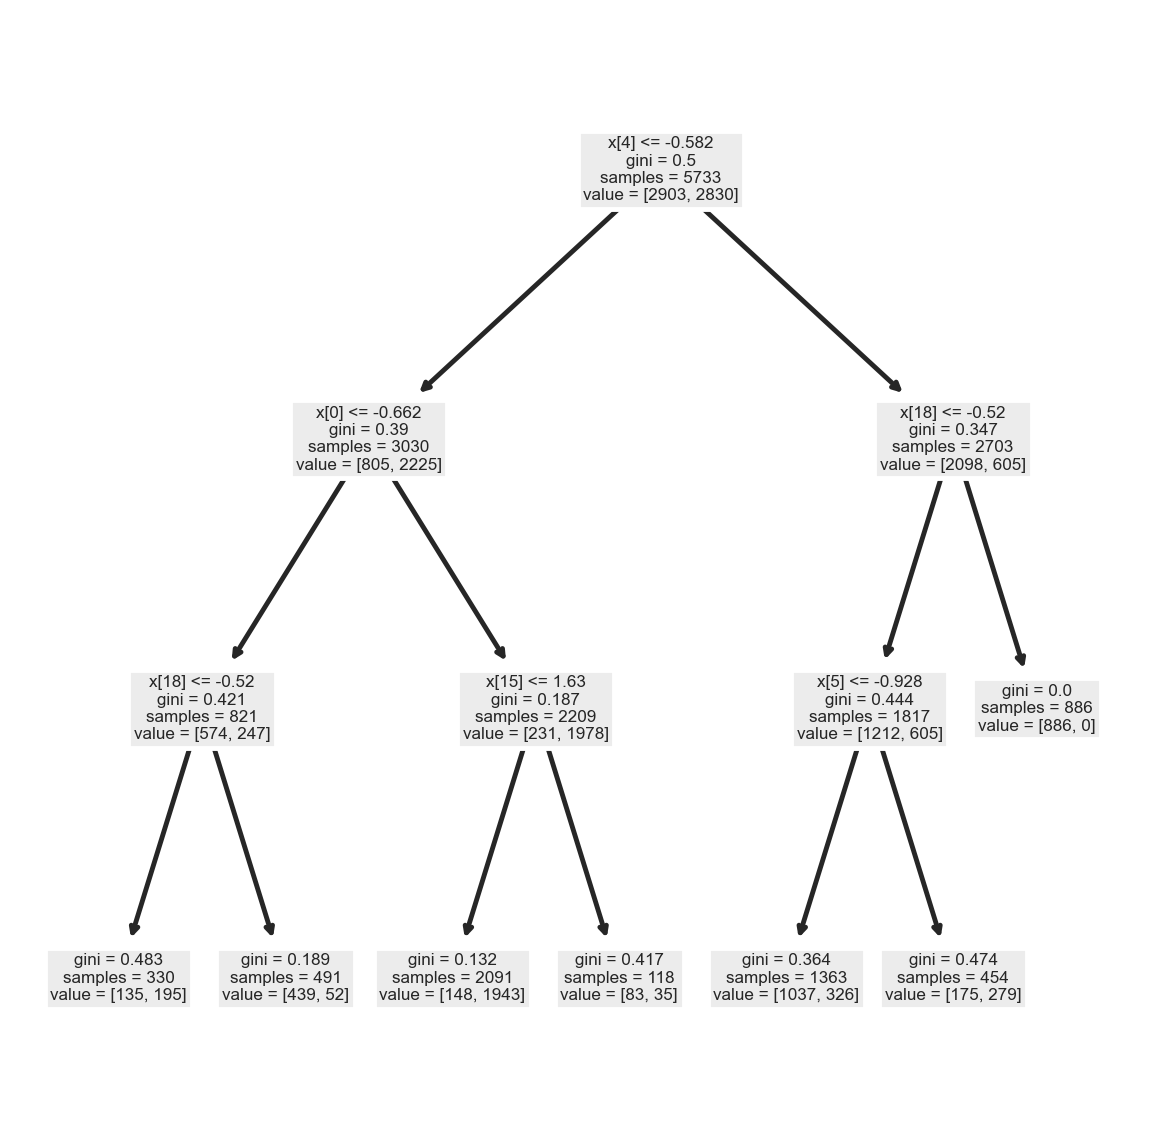

In [10]:
# Decision tree
#Create a Decision Tree classifier with the current max_depth
from sklearn import tree
DT=tr.DecisionTreeClassifier(max_depth=3)
model = DT.fit(x_tr, y_tr)

text_representation = tr.export_text(DT)
print(text_representation)

# To Visualize Decision Tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 350)
tree.plot_tree(model)

[0.8110936682365254, 0.8480725623582767, 0.8909820338391767, 0.9248212105354963, 0.9466248037676609, 0.9590092447235304]
[0.7995813710099424, 0.8466771323914181, 0.891156462585034, 0.9267399267399268, 0.945054945054945, 0.9555206698063841]
[2, 3, 4, 5, 6, 7]


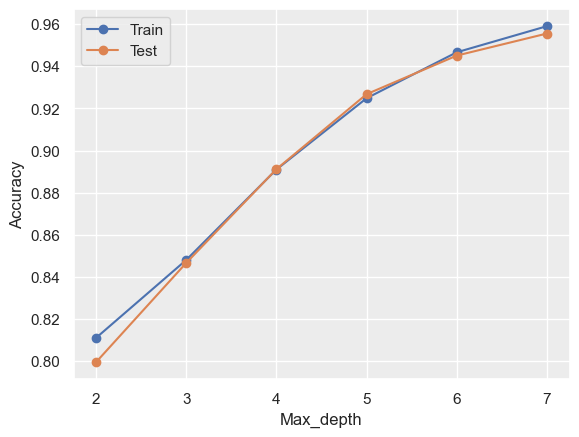

Training Accuracy: 0.9590092447235304
Testing Accuracy: 0.9555206698063841


In [11]:
trACC=[]
tesACC=[]
MD=[]

for i in range(2,8):
    #Create a Decision Tree classifier with the current max_depth
    DT=tr.DecisionTreeClassifier(max_depth=i)
    DT.fit(x_tr,y_tr)
    trACC.append(DT.score(x_tr,y_tr))
    tesACC.append(DT.score(x_tes,y_tes))
    MD.append(i)
    
print(trACC)
print(tesACC)
print(MD)

plt.figure()
plt.plot(MD, trACC, label='Train',marker='o')
plt.plot(MD, tesACC, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate training and testing accuracy
train_accuracy = DT.score(x_tr,y_tr)
test_accuracy = DT.score(x_tes,y_tes)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

In [12]:
# Print classification report
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
predictions = model.predict(x_tes)

# Calculate accuracy
accuracy = accuracy_score(y_tes, predictions)
print("Accuracy For DT:", accuracy)

# Print classification report
print("\nClassification Report for DT:")
print(classification_report(y_tes, predictions))


Accuracy For DT: 0.8466771323914181

Classification Report for DT:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       919
           1       0.85      0.85      0.85       992

    accuracy                           0.85      1911
   macro avg       0.85      0.85      0.85      1911
weighted avg       0.85      0.85      0.85      1911

